In [27]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import seaborn as sns
#from itertools import combinations 
#import plotnine as p



In [28]:
# read data
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context
data_source="https://github.com/scunning1975/mixtape/raw/master/"

def lm_robust(formula, data):
    regression = sm.OLS.from_formula(formula, data = data)
    regression = regression.fit(cov_type="cluster",cov_kwds={"groups":data['id']})
    return regression

In [29]:

lmb_data =pd.read_stata(data_source+"lmb-data.dta")


In [30]:
lmb_data

,state,district,incmbncy,demvote,repvote,year,congress,occupanc,name,eq_Dwhip,...,pres_rep_pct,n,lagged,_merge,democrat,lagdemocrat,score,lagscore,id,id2
0,01: Connecticut,1,-1: REPUBLICAN,127802.0,103294.0,1948.0,81.0,0.0,"RIBICOFF,",0.752336,...,NaN,1.0,14.760000,3,1.0,0.0,64.339996,14.760000,3.0,1.0
1,01: Connecticut,1,-1: REPUBLICAN,127802.0,103294.0,1948.0,81.0,0.0,"RIBICOFF,",0.752336,...,NaN,2.0,9.520000,3,1.0,0.0,60.279999,9.520000,4.0,1.0
2,01: Connecticut,1,1: DEMOCRAT,134258.0,96251.0,1950.0,82.0,0.0,"RIBICOFF,",0.770270,...,NaN,1.0,64.339996,3,1.0,1.0,57.060001,64.339996,5.0,1.0
3,01: Connecticut,1,1: DEMOCRAT,134258.0,96251.0,1950.0,82.0,0.0,"RIBICOFF,",0.770270,...,NaN,2.0,60.279999,3,1.0,1.0,73.830002,60.279999,6.0,1.0
4,01: Connecticut,1,1: DEMOCRAT,148935.0,112526.0,1954.0,84.0,0.0,DODD,0.730769,...,NaN,1.0,56.220001,3,1.0,1.0,42.959999,56.220001,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13583,82: Hawaii,2,1: DEMOCRAT,112377.0,20000.0,1984.0,99.0,0.0,"AKAKA, D",0.903061,...,0.557877,2.0,80.650002,3,1.0,1.0,65.660004,80.650002,17123.0,505.0
13584,82: Hawaii,2,1: DEMOCRAT,123830.0,35371.0,1986.0,100.0,0.0,"AKAKA, D",0.953293,...,NaN,1.0,88.489998,3,1.0,1.0,78.589996,88.489998,17124.0,505.0
13585,82: Hawaii,2,1: DEMOCRAT,123830.0,35371.0,1986.0,100.0,0.0,"AKAKA, D",0.953293,...,NaN,2.0,65.660004,3,1.0,1.0,58.529999,65.660004,17125.0,505.0
13586,82: Hawaii,2,1: DEMOCRAT,144802.0,0.0,1988.0,101.0,0.0,"AKAKA, DANI",0.940048,...,0.449764,1.0,78.589996,3,1.0,1.0,80.459999,78.589996,17126.0,505.0


In [31]:
lmb_data[['democrat','lagdemocrat']].tail(20)

,democrat,lagdemocrat
13568,1.0,1.0
13569,1.0,1.0
13570,1.0,1.0
13571,1.0,1.0
13572,1.0,0.0
13573,1.0,0.0
13574,1.0,1.0
13575,1.0,1.0
13576,1.0,1.0
13577,1.0,1.0


In [32]:
print(list(lmb_data))


['state', 'district', 'incmbncy', 'demvote', 'repvote', 'year', 'congress', 'occupanc', 'name', 'eq_Dwhip', 'eq_Rwhip', 'eq_Dlead', 'eq_Rlead', 'vote', 'republic', 'party', 'office', 'icpsr_id', 'whip_D', 'whip_R', 'vote_tot', 'demvoteshare', 'dembin', 'lagdemvoteshare', 'clusterid', 'pooleyear', 'redistrict', 'poolename', 'aclu_vs', 'acu_vs', 'aca_vs', 'ada_vs', 'afbf_vs', 'afge_vs', 'afscme_vs', 'aft_vs', 'asc_vs', 'bfw_vs', 'bctd_vs', 'carter_vs', 'ccus1_vs', 'ccus2_vs', 'cwla_vs', 'cv_vs', 'cvvf_vs', 'sane_vs', 'cfnfmp_vs', 'aflcio_vs', 'cfsca_vs', 'cfsce_vs', 'cfscd_vs', 'cfscs_vs', 'ccause_vs', 'cw_vs', 'cc_vs', 'cfa_vs', 'ike_vs', 'pfpike_vs', 'pdpike_vs', 'ford_vs', 'fcnl_vs', 'lbj_vs', 'pfplbj_vs', 'pdplbj_vs', 'jfk_vs', 'pfpjfk_vs', 'pdpjfk_vs', 'lfr_vs', 'lcv_vs', 'lwv_vs', 'll_vs', 'lfs_vs', 'nasc_vs', 'ncsc_vs', 'nea_vs', 'nfo_vs', 'nfu_vs', 'nfib_vs', 'ntu_vs', 'nwpc_vs', 'nr_vs', 'nixon_vs', 'reagan_vs', 'ripon_vs', 'twr_vs', 'uaw_vs', 'umw_vs', 'firstyear', 'adayear', '

In [33]:
lmb_data['demvoteshare_c'] = lmb_data['demvoteshare'] - 0.5
lmb_subset = lmb_data[lmb_data.lagdemvoteshare.between(.48, .52)]



In [34]:
lm_1 = lm_robust('score ~ lagdemocrat', data = lmb_subset)
lm_2 = lm_robust('score ~ democrat', data = lmb_subset)
lm_3 = lm_robust('democrat ~ lagdemocrat', data = lmb_subset)
print("Original results based on ADA Scores -- Close Elections Sample")
#Stargazer([lm_1, lm_2, lm_3])

Original results based on ADA Scores -- Close Elections Sample


In [35]:
from stargazer.stargazer import Stargazer


In [36]:
Stargazer([lm_1, lm_2, lm_3])

<AxesSubplot: xlabel='lagdemocrat', ylabel='score'>

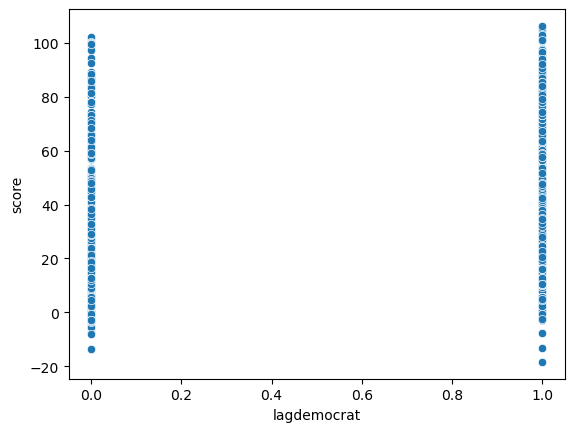

In [37]:
sns.scatterplot(data=lmb_subset, x="lagdemocrat", y="score")

In [38]:
lm_1_full = lm_robust('score ~ lagdemocrat', data = lmb_data)
lm_2_full = lm_robust('score ~ democrat', data = lmb_data)
lm_3_full = lm_robust('democrat ~ lagdemocrat', data = lmb_data)
print("Original results based on ADA Scores -- Full Sample")
Stargazer([lm_1_full, lm_2_full, lm_3_full])

Original results based on ADA Scores -- Full Sample


In [39]:
data1 =pd.read_stata("/Users/sakibanwar/Downloads/enricoall2.dta")
data1

ValueError: Version of given Stata file is 110. pandas supports importing versions 105, 108, 111 (Stata 7SE), 113 (Stata 8/9), 114 (Stata 10/11), 115 (Stata 12), 117 (Stata 13), 118 (Stata 14/15/16),and 119 (Stata 15/16, over 32,767 variables).

In [2]:
import requests
import os

base_url = "https://adaction.org/wp-content/uploads/"
years_first_part = range(2017, 2023)  # From 2017 to 2022
months = range(1, 13)  # From 1 to 12
years_last_part = range(2010, 2023)  # From 2010 to 2022

# Create a directory to store the downloaded PDFs
os.makedirs("downloaded_pdfs", exist_ok=True)

for year1 in years_first_part:
    for month in months:
        for year2 in years_last_part:
            pdf_url = f"{base_url}/{year1}/{month:02}/{year2}.pdf"
            response = requests.get(pdf_url)
            
            # Check if the request was successful
            if response.status_code == 200:
                with open(f"downloaded_pdfs/{year2}.pdf", "wb") as pdf_file:
                    pdf_file.write(response.content)
                print(f"Downloaded {year2}.pdf successfully!")
            else:
                print(f"Failed to download {year2}.pdf from {pdf_url}. Status code: {response.status_code}")

print("Download process completed!")


Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2017/01/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2017/01/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2017/01/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2017/01/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2017/01/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2017/01/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2017/01/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2017/01/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2017/01/2018.pdf. Status code: 404
Failed to download 

Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2017/06/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2017/06/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2017/07/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2017/07/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2017/07/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2017/07/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2017/07/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2017/07/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2017/07/2016.pdf. Status code: 404
Failed to download 

Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2018/01/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2018/01/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2018/01/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2018/01/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2018/01/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2018/01/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2018/01/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2018/01/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2018/01/2018.pdf. Status code: 404
Failed to download 

Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2018/06/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2018/06/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2018/07/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2018/07/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2018/07/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2018/07/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2018/07/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2018/07/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2018/07/2016.pdf. Status code: 404
Failed to download 

Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2018/12/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2018/12/2020.pdf. Status code: 404
Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2018/12/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2018/12/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2019/01/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2019/01/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2019/01/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2019/01/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2019/01/2014.pdf. Status code: 404
Failed to download 

Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2019/06/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2019/06/2018.pdf. Status code: 404
Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2019/06/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2019/06/2020.pdf. Status code: 404
Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2019/06/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2019/06/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2019/07/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2019/07/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2019/07/2012.pdf. Status code: 404
Failed to download 

Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2019/12/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2019/12/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2019/12/2018.pdf. Status code: 404
Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2019/12/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2019/12/2020.pdf. Status code: 404
Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2019/12/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2019/12/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2020/01/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2020/01/2011.pdf. Status code: 404
Failed to download 

Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2020/06/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2020/06/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2020/06/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2020/06/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2020/06/2018.pdf. Status code: 404
Downloaded 2019.pdf successfully!
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2020/06/2020.pdf. Status code: 404
Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2020/06/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2020/06/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2020/07/2010.pdf. St

Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2020/12/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2020/12/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2020/12/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2020/12/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2020/12/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2020/12/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2020/12/2018.pdf. Status code: 404
Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2020/12/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2020/12/2020.pdf. Status code: 404
Failed to download 

Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2021/06/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2021/06/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2021/06/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2021/06/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2021/06/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2021/06/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2021/06/2016.pdf. Status code: 404
Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2021/06/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2021/06/2018.pdf. Status code: 404
Failed to download 

Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2021/11/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2021/11/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2021/12/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2021/12/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2021/12/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2021/12/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2021/12/2014.pdf. Status code: 404
Failed to download 2015.pdf from https://adaction.org/wp-content/uploads//2021/12/2015.pdf. Status code: 404
Failed to download 2016.pdf from https://adaction.org/wp-content/uploads//2021/12/2016.pdf. Status code: 404
Failed to download 

Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2022/05/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2022/05/2020.pdf. Status code: 404
Failed to download 2021.pdf from https://adaction.org/wp-content/uploads//2022/05/2021.pdf. Status code: 404
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2022/05/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2022/06/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2022/06/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2022/06/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2022/06/2013.pdf. Status code: 404
Failed to download 2014.pdf from https://adaction.org/wp-content/uploads//2022/06/2014.pdf. Status code: 404
Failed to download 

Failed to download 2017.pdf from https://adaction.org/wp-content/uploads//2022/11/2017.pdf. Status code: 404
Failed to download 2018.pdf from https://adaction.org/wp-content/uploads//2022/11/2018.pdf. Status code: 404
Failed to download 2019.pdf from https://adaction.org/wp-content/uploads//2022/11/2019.pdf. Status code: 404
Failed to download 2020.pdf from https://adaction.org/wp-content/uploads//2022/11/2020.pdf. Status code: 404
Downloaded 2021.pdf successfully!
Failed to download 2022.pdf from https://adaction.org/wp-content/uploads//2022/11/2022.pdf. Status code: 404
Failed to download 2010.pdf from https://adaction.org/wp-content/uploads//2022/12/2010.pdf. Status code: 404
Failed to download 2011.pdf from https://adaction.org/wp-content/uploads//2022/12/2011.pdf. Status code: 404
Failed to download 2012.pdf from https://adaction.org/wp-content/uploads//2022/12/2012.pdf. Status code: 404
Failed to download 2013.pdf from https://adaction.org/wp-content/uploads//2022/12/2013.pdf. St

In [7]:
#!pip install PyPDF2 pandas



import PyPDF2
import pandas as pd

def extract_data_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)  # Changed from PdfFileReader to PdfReader
        text = ""
        for page_num in range(len(reader.pages)):  # Changed from reader.numPages to len(reader.pages)
            text += reader.pages[page_num].extract_text()  # Changed from reader.getPage(page_num) to reader.pages[page_num]
    return text

def parse_data(text):
    lines = text.split('\n')
    data = []
    state = None
    for line in lines:
        if line.isupper():  # This is a state name
            state = line
        elif state and '%' in line:  # This is a candidate line with LQ score
            parts = line.split()
            candidate = ' '.join(parts[:-2])
            lq_score = parts[-1]
            data.append([state, candidate, lq_score])
            state = None  # Reset the state for the next iteration
    return data

def create_dataframe(data):
    df = pd.DataFrame(data, columns=['State', 'Candidate', 'LQ Score'])
    return df

pdf_path = "/Users/sakibanwar/Library/CloudStorage/OneDrive-TheUniversityofWinchester/Untitled Folder 1/downloaded_pdfs/2019.pdf"  # Replace with your PDF path
text = extract_data_from_pdf(pdf_path)
data = parse_data(text)
df = create_dataframe(data)
print(df)

# If you want to save the dataframe to a CSV file
# df.to_csv("output.csv", index=False)


             State                                        Candidate LQ Score
0          ALABAMA        1 Byrne - --X --- - - - - - - - - - - - -       0%
1           ALASKA  AL Young, D. (R) - -+---- - - - - -X -X + - - -      10%
2          ARIZONA     1 O'Halleran -++++++ + + - - - + + + + + + +      80%
3         ARKANSAS      1 Crawford - ------ - - - - - - - - - - - -       0%
4       CALIFORNIA       1 LaMalfa - ------ - - - - - - - - - - - -       0%
..             ...                                              ...      ...
98        VIRGINIA              Kaine + + +++++++ + + + + + + + + +    +100%
99      WASHINGTON     Cantwell (D) + + +++++++ + + + + + + + + + -      95%
100  WEST VIRGINIA          Capito - - ----+ -- - - - - - - - - - -       5%
101      WISCONSIN            Baldwin + + +++++++ + + + + + + + + +    +100%
102        WYOMING     Barrasso (R) - - ------- - - - - - - - - - -       0%

[103 rows x 3 columns]


In [8]:
df

,State,Candidate,LQ Score
0,ALABAMA,1 Byrne - --X --- - - - - - - - - - - - -,0%
1,ALASKA,"AL Young, D. (R) - -+---- - - - - -X -X + - - -",10%
2,ARIZONA,1 O'Halleran -++++++ + + - - - + + + + + + +,80%
3,ARKANSAS,1 Crawford - ------ - - - - - - - - - - - -,0%
4,CALIFORNIA,1 LaMalfa - ------ - - - - - - - - - - - -,0%
...,...,...,...
98,VIRGINIA,Kaine + + +++++++ + + + + + + + + +,+100%
99,WASHINGTON,Cantwell (D) + + +++++++ + + + + + + + + + -,95%
100,WEST VIRGINIA,Capito - - ----+ -- - - - - - - - - - -,5%
101,WISCONSIN,Baldwin + + +++++++ + + + + + + + + +,+100%


In [12]:
df[df['State']=='ALABAMA']

,State,Candidate,LQ Score
0,ALABAMA,1 Byrne - --X --- - - - - - - - - - - - -,0%
53,ALABAMA,Jones + - + - - -++ + + + + + + + + - - -,65%


In [20]:
import PyPDF2
import pandas as pd

# Open the PDF file
with open('/Users/sakibanwar/Library/CloudStorage/OneDrive-TheUniversityofWinchester/Untitled Folder 1/downloaded_pdfs/2019.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    page = reader.pages[4]  # Assuming the table starts on page 4
    text = page.extract_text()

# Split the text into lines
lines = text.split('\n')

# Initialize lists to store data
seats = []
states = []
names = []
lq_scores = []

# Variables to keep track of current state and seat
current_state = None
current_seat = None

# Iterate through the lines to extract data
for line in lines:
    # Check if line contains a state abbreviation (e.g., "AL")
    if len(line) == 2 and line.isupper():
        current_state = line
    # Check if line contains a seat number
    elif line.isdigit():
        current_seat = line
    # Check if line contains a name
    elif any(char.isalpha() for char in line) and not line.isupper():
        names.append(line)
        seats.append(current_seat)
        states.append(current_state)
    # Check if line contains LQ Score
    elif "%" in line:
        lq_scores.append(line)

# Print lengths for debugging
print("Seats Length:", len(seats))
print("States Length:", len(states))
print("Names Length:", len(names))
print("LQ Scores Length:", len(lq_scores))

print(names) 


Seats Length: 43
States Length: 43
Names Length: 43
LQ Scores Length: 0
[' ADA 2019 Congressional Voting Record ADA c ongressionAl  Voting  recorD  2019 ', 'U. S. House of Representatives', 'V ote Number 12345 6 7 8 910 11 12 13 14 15 16 17 18 19 20 LQ', 'ADA Position NYYYY Y Y Y Y Y Y Y Y Y Y Y Y Y Y Y %', 'CALIFORNIA (cont.)  ', '16 Costa -+++++-+++--++++++++80%', '17 Khanna -+++++++++++++++++++95%', '18 Eshoo -+++++++++++++++++++95%', '19 Lofgren -+++++++++++++++++++95%', '20 Panetta -++++++++++-++++++++90%', '21 Cox -++++++++---++++++++80%', '22 Nunes -------------------- 0%', '23 McCarthy --+----------------- 5%', '24 Carbajal -++++++++++-++++++++90%', '25 Hill IIII++++++--++++++++70%', '26 Brownley -++++++++++-++++++++90%', '27 Chu -+++++++++++++++++++95%', '28 Schiff -+++++++++++++++++++95%', '29 Cardenas ++++++++++++++++++++100%', '30 Sherman -++++++++++-++++++++90%', '31 Aguilar -+++++++++++++++++++95%', '32 Napolitano -+++++++++++++++++++95%', '33 Lieu +XX+++++++++++++++++90%

In [1]:
import PyPDF2
import pandas as pd
my_path='/Users/sakibanwar/Library/CloudStorage/OneDrive-TheUniversityofWinchester/Untitled Folder 1/downloaded_pdfs/2019.pdf'


# List of U.S. state names
state_names = [
    "ALABAMA", "ALASKA", "ARIZONA", "ARKANSAS", "CALIFORNIA", "COLORADO", "CONNECTICUT", "DELAWARE", "FLORIDA", 
    "GEORGIA", "HAWAII", "IDAHO", "ILLINOIS", "INDIANA", "IOWA", "KANSAS", "KENTUCKY", "LOUISIANA", "MAINE", 
    "MARYLAND", "MASSACHUSETTS", "MICHIGAN", "MINNESOTA", "MISSISSIPPI", "MISSOURI", "MONTANA", "NEBRASKA", 
    "NEVADA", "NEW HAMPSHIRE", "NEW JERSEY", "NEW MEXICO", "NEW YORK", "NORTH CAROLINA", "NORTH DAKOTA", "OHIO", 
    "OKLAHOMA", "OREGON", "PENNSYLVANIA", "RHODE ISLAND", "SOUTH CAROLINA", "SOUTH DAKOTA", "TENNESSEE", "TEXAS", 
    "UTAH", "VERMONT", "VIRGINIA", "WASHINGTON", "WEST VIRGINIA", "WISCONSIN", "WYOMING"
]
# Open the PDF file
with open(my_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    
    # Initialize an empty string to store all the text
    text = ""
    
    # Assuming the table starts on page 4 and ends on page 7 (adjust as needed)
    for page_num in range(3, 16):
        text += reader.pages[page_num].extract_text()

# Split the text into lines
lines = text.split('\n')

# Initialize lists to store data
seats = []
states = []
names = []
lq_scores = []

# Variables to keep track of current state
current_state = None

# Iterate through the lines to extract data
for line in lines:
    # Check if line contains a full state name
    if any(state in line for state in state_names):
        # Remove "(cont.)" and strip to get the clean state name
        current_state = line.replace("(cont.)", "").strip()
    # Check if line contains seat number, name, and LQ score
    elif any(char.isdigit() for char in line) and "%" in line:
        parts = line.split()
        seats.append(parts[0])
        names.append(' '.join(parts[1:-1]))
        lq_scores.append(parts[-1])
        states.append(current_state)

# Print lengths for debugging
print("Seats Length:", len(seats))
print("States Length:", len(states))
print("Names Length:", len(names))
print("LQ Scores Length:", len(lq_scores))

# Create a pandas DataFrame
df = pd.DataFrame({
    'Seat': seats,
    'State': states,
    'Name': names,
    'LQ Score': lq_scores
})




df



Seats Length: 434
States Length: 434
Names Length: 434
LQ Scores Length: 434


,Seat,State,Name,LQ Score
0,1,ALABAMA,Byrne - --X --- - - - - - - - - - - - - -,0%
1,2,ALABAMA,Roby - -+---- - - - - - - - - - - - - -,5%
2,3,ALABAMA,Rogers M. - -+-+ -- - - - - -X - - - - X - -,10%
3,4,ALABAMA,Aderholt - -X -+ -- - - - - - - - - - - - - -,5%
4,5,ALABAMA,Brooks M. - ------ - - - - - - - - - - - - -,0%
...,...,...,...,...
429,5,WISCONSIN,Sensenbrenner --------- - - - - - - - - - - -,0%
430,6,WISCONSIN,Grothman ---------X X X - - - - - - - -,0%
431,7,WISCONSIN,Duffy IIIIII--- - - - - - - - - - - -,0%
432,8,WISCONSIN,Gallagher --+-+---- - - - - - - - - - -,-10%


In [2]:
# Remove the '%' symbol, fill NaN values with 0, and then convert to integer
df['LQ Score'] =  df['LQ Score'].str.extract('(\d+)').fillna(0).astype(int)

# Clean up the 'Name' column by removing any unwanted characters
df['Name'] = df['Name'].str.replace('[^a-zA-Z\s.]|X', '', regex=True).str.strip()

df



,Seat,State,Name,LQ Score
0,1,ALABAMA,Byrne,0
1,2,ALABAMA,Roby,5
2,3,ALABAMA,Rogers M.,10
3,4,ALABAMA,Aderholt,5
4,5,ALABAMA,Brooks M.,0
...,...,...,...,...
429,5,WISCONSIN,Sensenbrenner,0
430,6,WISCONSIN,Grothman,0
431,7,WISCONSIN,Duffy IIIIII,0
432,8,WISCONSIN,Gallagher,10


In [3]:
df['Name'] = df['Name'].str.replace('A Newsletter for Liberal', '', regex=False).str.strip()

In [4]:
df

,Seat,State,Name,LQ Score
0,1,ALABAMA,Byrne,0
1,2,ALABAMA,Roby,5
2,3,ALABAMA,Rogers M.,10
3,4,ALABAMA,Aderholt,5
4,5,ALABAMA,Brooks M.,0
...,...,...,...,...
429,5,WISCONSIN,Sensenbrenner,0
430,6,WISCONSIN,Grothman,0
431,7,WISCONSIN,Duffy IIIIII,0
432,8,WISCONSIN,Gallagher,10
